# Portfolio Constructions Using Centralities


In [1]:
import numpy as np
import pandas as pd

#%matplotlib inline
import matplotlib.pyplot as plt

from itertools import product

#import seaborn as sns
#import networkx as nx
#from PMFG_mod import PMFG
#from time import time
#import timeit

## Importing Data

In [2]:
# S&P constituents daily return data

log_returns_df = pd.read_excel("data/historical_2016_2019.xlsx", index_col='Names Date')
stock_names = log_returns_df.columns   # this is just simple returns, not log -- but whatevs
df_shape = (log_returns_df.shape)
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset.")
print(f"Data timeperiod covers: {log_returns_df.index[0]} to {log_returns_df.index[-1]}")

ticker_names = log_returns_df.columns

There are 1006 rows and 485 columns in the dataset.
Data timeperiod covers: 2016-01-04 00:00:00 to 2019-12-31 00:00:00


In [3]:
log_returns_df.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Names Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,-0.026788,-0.034002,0.011494,0.000855,-0.027515,-0.017742,-0.055826,-0.044088,-0.025550,-0.020971,...,-0.005848,-0.024910,-0.006286,-0.032703,-0.011507,-0.011499,-0.007603,-0.045370,-0.021612,-0.013564
2016-01-05,-0.003441,-0.009533,-0.006831,-0.025059,-0.004166,0.014626,-0.002816,-0.000233,0.005205,0.004023,...,0.010084,0.014847,0.008521,0.020387,-0.000277,-0.002493,0.020823,-0.025117,-0.010857,0.015655
2016-01-06,0.004439,0.017522,-0.026455,-0.019570,0.000174,-0.015286,0.003529,-0.008388,-0.001954,-0.014295,...,0.010538,-0.018287,-0.008321,-0.014486,-0.012476,-0.007080,0.004330,-0.039957,-0.029145,0.000208
2016-01-07,-0.042475,-0.018918,0.011073,-0.042205,-0.002963,-0.031932,-0.039625,-0.023966,-0.029366,-0.020984,...,0.003842,-0.039448,-0.016006,-0.008785,-0.025828,-0.034116,-0.022993,-0.045316,-0.030020,-0.030404
2016-01-08,-0.010513,-0.001978,-0.021971,0.005288,-0.027268,-0.005785,0.032471,-0.020944,-0.009681,-0.014140,...,-0.010935,-0.020534,-0.020202,-0.028635,-0.009510,-0.013607,-0.004217,-0.002693,-0.011254,-0.014605


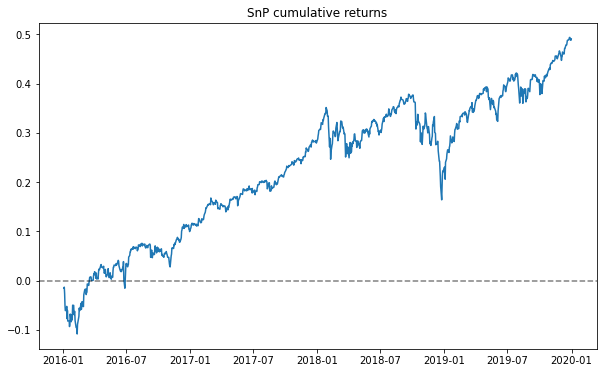

In [4]:
# S&P500 daily returns
SnP_returns = pd.read_csv('data/SnP_returns.csv', index_col='DATE', parse_dates=True).squeeze()

plt.figure(figsize=(10,6))
plt.title('SnP cumulative returns')
plt.plot(SnP_returns.cumsum())
plt.axhline(0, linestyle='--', color='k', alpha=.5)
plt.show()

In [5]:
# XY centrality ranking; computed in the previous workbook
#XY_rankings = pd.read_csv("data/XY_rankings.csv", index_col='Date', parse_dates=True)
XY_rankings = pd.read_csv("data/XY_rankings_126.csv", index_col='Date', parse_dates=True)
print(XY_rankings.info())

# quarterly rebalanced XY ranking
XY_rankings.iloc[252:505:63]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2016-01-04 to 2019-12-31
Columns: 485 entries, A to ZTS
dtypes: float64(485)
memory usage: 3.7 MB
None


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,471.0,435.0,50.5,66.0,89.0,45.0,224.0,260.0,382.0,429.0,...,222.0,82.0,122.0,182.5,461.0,398.5,336.0,249.0,299.0,179.5
2016-04-05,471.0,435.0,50.5,66.0,89.0,45.0,224.0,260.0,382.0,429.0,...,222.0,82.0,122.0,182.5,461.0,398.5,336.0,249.0,299.0,179.5
2016-07-05,471.0,435.0,50.5,66.0,89.0,45.0,224.0,260.0,382.0,429.0,...,222.0,82.0,122.0,182.5,461.0,398.5,336.0,249.0,299.0,179.5
2016-10-03,196.5,395.0,326.0,55.5,93.0,61.0,129.0,195.0,418.5,352.0,...,278.0,409.5,67.0,247.0,412.5,449.0,177.0,184.5,400.0,184.5
2017-01-03,337.0,350.5,108.5,241.5,355.0,133.0,87.0,176.0,329.0,469.0,...,339.0,418.0,170.0,207.0,299.0,177.0,150.0,4.0,362.0,62.0


## "Investing in peripherals"
Pozzi proposed that investing in peripherals is better than investing in centrals in terms of information ratio; that peripherals achieve an IR comparable to that of market; and that centrals consistently underperform any other options. Let's see if that's true.

In [6]:
# Unused
def shrinkage_estimator(corr, shrinkage_coef):
    shrinkage_target=np.eye(corr.shape[1])
    return corr*(1-shrinkage_coef) + shrinkage_target*shrinkage_coef

# Ledoit-Wolfe covariance shrinkage estimator
def LW_cov(df, shrinkage_coef=1e-4):
    cov = df.cov()
    return (1 - shrinkage_coef) * cov + shrinkage_coef * np.diag(np.diag(cov))


def markowitz_min_var(cov):
    u = np.ones(len(cov))
    Cinv = np.linalg.solve(cov, u)
    return Cinv/(u@Cinv)

class Backtester:
    def __init__(self, basket_size, basket_update_frequency, rebalance_frequency, rolling_window, XY_ranking):
        self.basket_size=  basket_size
        assert basket_update_frequency >= rebalance_frequency
        self.basket_update_frequency = basket_update_frequency
        self.rebalance_frequency     = rebalance_frequency
        self.rolling_window          = rolling_window
        self.XY_ranking              = XY_ranking
    
    def backtest_equal_weight(self, data, verbose = False):
        T, n = data.shape
        portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']
        df_portfolios   = pd.DataFrame(columns=portfolio_names)
        
        XY = self.XY_ranking.iloc[0]
        high_cen_basket = XY.index[XY.to_numpy().argsort()[:self.basket_size]]
        low_cen_basket  = XY.index[XY.to_numpy().argsort()[-self.basket_size:]]
        if verbose:
            print('Initial peripheral basket:\n', low_cen_basket)
            print('Initial Central basket:\n'   , high_cen_basket)
        
        for t in range(self.rolling_window, T-1):
            ind_date = data.index[t]
            if (t - self.rolling_window)%self.basket_update_frequency == 0:
                XY = self.XY_ranking.loc[ind_date]
                
                #low_cen_basket  = XY.index[XY <= self.basket_size]
                #high_cen_basket = XY.index[XY>n-self.basket_size+1] #graph completeness issues 
                #high_cen_basket = XY.index[XY > len(XY) - self.basket_size]
                prev_low_cen_basket  = low_cen_basket
                prev_high_cen_basket = high_cen_basket
                high_cen_basket = XY.index[XY.to_numpy().argsort()[:self.basket_size]]
                low_cen_basket  = XY.index[XY.to_numpy().argsort()[-self.basket_size:]]
                random_basket   = XY.index[np.random.choice(len(XY), self.basket_size, replace=False)]
                
                if verbose:
                    prev_P, curr_P, prev_C, curr_C = set(prev_low_cen_basket), set(low_cen_basket), set(prev_high_cen_basket), set(high_cen_basket)
                    print('\n--------------------------')
                    print('Recomputing filtered network at ', data.index[t])
                    #print('Peripheral basket: ', low_cen_basket)
                    print('\nStocks that left the peripheral basket: (%d)'%(len(prev_P-curr_P)))
                    print(prev_P-curr_P)
                    print('Stocks that entered the peripheral basket:')
                    print(curr_P-prev_P)
                    
                    #print('Central basket: '   , high_cen_basket)
                    print('\nStocks that entered the central basket: (%d)'%(len(curr_C-prev_C)))
                    print(curr_C-prev_C)
                    print('Stocks that left the central basket: ')
                    print(prev_C-curr_C)
                    
                assert len(low_cen_basket) == len(high_cen_basket) == self.basket_size
                
            #low_cen_returns.append(data[low_cen_basket].iloc[t].sum()/self.basket_size)
            #peripheral_return = data[low_cen_basket].iloc[t]  @ eq_weights
            peripheral_return = data[low_cen_basket].iloc[t+1].mean()
            central_return    = data[high_cen_basket].iloc[t+1].mean() 
            random_return     = data[random_basket].iloc[t+1].mean()
            market_return     = data.iloc[t+1].mean() 
            df_portfolios.loc[data.index[t+1]] = [peripheral_return, central_return, random_return, market_return]
        return df_portfolios
    
        
    def backtest_markowitz_weight(self, data, verbose = False):
        
        T, n = data.shape
        portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']
        df_portfolios   = pd.DataFrame(columns=portfolio_names)
        eq_weights      = np.array([1/self.basket_size] * self.basket_size)
        
        XY = self.XY_ranking.iloc[0]
        high_cen_basket = XY.index[XY.to_numpy().argsort()[:self.basket_size]]
        low_cen_basket  = XY.index[XY.to_numpy().argsort()[-self.basket_size:]]
        if verbose:
            print('Initial peripheral basket:\n', low_cen_basket)
            print('Initial Central basket:\n'   , high_cen_basket)
        
        for t in range(self.rolling_window, T-1):
            ind_date = data.index[t]
            if (t - self.rolling_window)%self.basket_update_frequency == 0:
                XY = self.XY_ranking.loc[ind_date]
                
                prev_low_cen_basket  = low_cen_basket
                prev_high_cen_basket = high_cen_basket
                high_cen_basket = XY.index[XY.to_numpy().argsort()[:self.basket_size]]
                low_cen_basket  = XY.index[XY.to_numpy().argsort()[-self.basket_size:]]
                random_basket   = XY.index[np.random.choice(len(XY), self.basket_size, replace=False)]
                
                if verbose:
                    prev_P, curr_P, prev_C, curr_C = set(prev_low_cen_basket), set(low_cen_basket), set(prev_high_cen_basket), set(high_cen_basket)
                    print('\n--------------------------')
                    print('Recomputing filtered network at ', data.index[t])
                    print('\nStocks that left the peripheral basket: (%d)'%(len(prev_P-curr_P)))
                    print(prev_P-curr_P)
                    print('Stocks that entered the peripheral basket:')
                    print(curr_P-prev_P)
                    
                    print('\nStocks that entered the central basket: (%d)'%(len(curr_C-prev_C)))
                    print(curr_C-prev_C)
                    print('Stocks that left the central basket: ')
                    print(prev_C-curr_C)
                    
                assert len(low_cen_basket) == len(high_cen_basket) == self.basket_size
                
            # may need to tinker with shrinkage coef (default: 1e-4)
            peripheral_return = markowitz_min_var(LW_cov(data.iloc[t - self.rolling_window:t][low_cen_basket]))@data[low_cen_basket].iloc[t+1]
            central_return    = markowitz_min_var(LW_cov(data.iloc[t - self.rolling_window:t][high_cen_basket]))@data[high_cen_basket].iloc[t+1]
            random_return     = markowitz_min_var(LW_cov(data.iloc[t - self.rolling_window:t][random_basket]))@data[random_basket].iloc[t+1]
            market_return     = markowitz_min_var(LW_cov(data.iloc[t - self.rolling_window:t]))@data.iloc[t+1]
            
            df_portfolios.loc[data.index[t+1]] = [peripheral_return, central_return, random_return, market_return]
        return df_portfolios
    
portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']

def compute_betas(df, benchmark_returns):
    betas = {}
    ttl_per = pd.DataFrame(columns=['Port returns'])
    for portname in portfolio_names:
        ttl_per['Port returns'] = df[portname]
        ttl_per['SnP returns'] = benchmark_returns
        ttl_per = ttl_per.dropna()
        betas[portname] = ttl_per.cov().iloc[0,1]/ ttl_per.cov().iloc[1,1]
    
    return betas


### Markowitz

In [7]:
# basket size 30, quarterly rebalance, 1y rolling window for est.
t_back = Backtester(30, 63, 1, 252, XY_rankings)
#back_results = t_back.backtest_equal_weight(log_returns_df, SnP_returns, verbose=True)
back_results = t_back.backtest_markowitz_weight(log_returns_df, verbose=True)

Initial peripheral basket:
 Index(['NTRS', 'DGX', 'AMT', 'BEN', 'SWK', 'USD', 'V', 'CAT', 'FOX', 'PH',
       'XYL', 'TMO', 'CE', 'MHK', 'IR', 'FISV', 'MS', 'IEX', 'AMP', 'MA', 'A',
       'EFX', 'ADP', 'TROW', 'SNPS', 'C', 'IVZ', 'MCO', 'BLK', 'ROK'],
      dtype='object')
Initial Central basket:
 Index(['PRGO', 'EA', 'DG', 'SYY', 'MNST', 'BH', 'MLSS', 'GNRC', 'BBY', 'GPS',
       'DPZ', 'WMT', 'AMD', 'AIZ', 'FE', 'KR', 'AXP', 'PPL', 'O', 'RE', 'PEG',
       'AWK', 'SRE', 'EIX', 'D', 'DLR', 'EL', 'ULTA', 'PAR', 'EW'],
      dtype='object')

--------------------------
Recomputing filtered network at  2017-01-03 00:00:00

Stocks that left the peripheral basket: (21)
{'MHK', 'FOX', 'SNPS', 'A', 'ROK', 'V', 'SWK', 'CE', 'ADP', 'XYL', 'TROW', 'BLK', 'MCO', 'AMT', 'NTRS', 'TMO', 'IR', 'FISV', 'EFX', 'DGX', 'MA'}
Stocks that entered the peripheral basket:
{'ETN', 'TEL', 'KEYS', 'JPM', 'CTXS', 'TDY', 'UPS', 'MPWR', 'DAL', 'TER', 'APH', 'PNR', 'MMC', 'LRCX', 'GS', 'JKHY', 'ADI', 'ITW', 'AJG', 

In [8]:
(back_results).head()

,Peripheral,Central,Random,Market
2017-01-04,-0.001395,-0.002251,0.002141,-0.003655
2017-01-05,0.000662,0.004263,-0.004816,0.006179
2017-01-06,0.003806,-0.002951,-0.000673,0.004880
2017-01-09,-0.005503,-0.004166,-0.006707,-0.001745
2017-01-10,-0.002469,-0.000333,0.000824,-0.003891


### Portfolios: Summary Statistics
(Annualized)

In [9]:
print('Mean returns:')
print(back_results.mean()*252)
print('\nStandard deviation of returns:')
print(back_results.std() * np.sqrt(252))

# RAJ: should we take away the benchmark/riskfree return first?
print('\nRisk Adjusted Returns:')
print(back_results.mean()/back_results.std() * np.sqrt(252))

Mean returns:
Peripheral    0.170843
Central       0.118925
Random        0.095405
Market        0.124782
dtype: float64

Standard deviation of returns:
Peripheral    0.135761
Central       0.104311
Random        0.105575
Market        0.096155
dtype: float64

Risk Adjusted Returns:
Peripheral    1.258405
Central       1.140101
Random        0.903674
Market        1.297715
dtype: float64


In [10]:
XS_returns = back_results.add(-SnP_returns, axis=0).dropna()
XS_returns.head()

,Peripheral,Central,Random,Market
2017-01-04,-0.007117,-0.007973,-0.003581,-0.009377
2017-01-05,0.001433,0.005034,-0.004045,0.006950
2017-01-06,0.000289,-0.006468,-0.004190,0.001363
2017-01-09,-0.001954,-0.000617,-0.003158,0.001804
2017-01-10,-0.002469,-0.000333,0.000824,-0.003891


In [11]:
print('Mean excess returns')
print(XS_returns.mean()*252)
print('\nTracking error:')
print(XS_returns.std() * np.sqrt(252))

# RAJ: should we take away the benchmark/riskfree return first?
print('\nInformation ratio:')
print(XS_returns.mean()/back_results.std() * np.sqrt(252))

Mean excess returns
Peripheral    0.042689
Central      -0.009228
Random       -0.032748
Market       -0.003372
dtype: float64

Tracking error:
Peripheral    0.115106
Central       0.101209
Random        0.102479
Market        0.128868
dtype: float64

Information ratio:
Peripheral    0.314441
Central      -0.088470
Random       -0.310190
Market       -0.035068
dtype: float64


In [13]:
markowitz_betas = compute_betas(back_results, SnP_returns)
markowitz_betas

{'Peripheral': 0.6580795960888708,
 'Central': 0.5194531894119122,
 'Random': 0.5196496477068044,
 'Market': 0.2754327382530214}

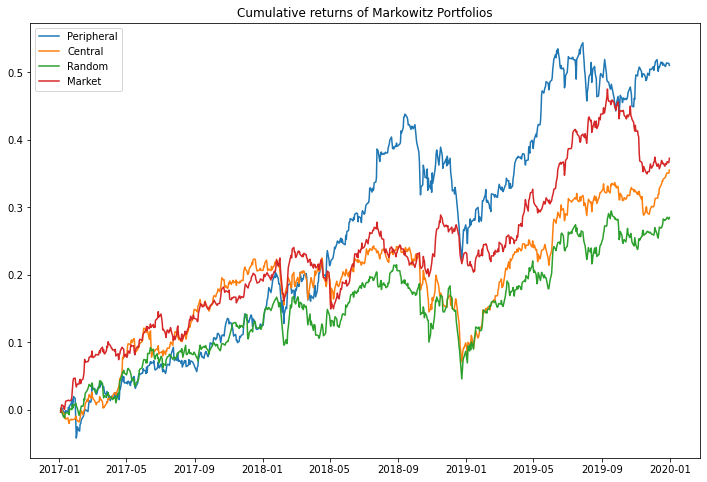

In [14]:
plt.figure(figsize=(12,8))
plt.title('Cumulative returns of Markowitz Min-variance Portfolios')
portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']
#plt.plot(back_results.cumsum(), label=portfolio_names)
for name in portfolio_names:
    plt.plot(back_results[name].cumsum(), label=name)

plt.legend()
plt.show();

### Equal Weights

In [15]:
eqw_back_results = t_back.backtest_equal_weight(log_returns_df, verbose=False)
eqw_back_results.head()

,Peripheral,Central,Random,Market
2017-01-04,0.007816,0.018088,0.010701,0.011049
2017-01-05,-0.006171,0.002993,-0.002036,-0.002746
2017-01-06,0.005402,0.002326,0.006128,0.003402
2017-01-09,-0.005525,-0.000097,-0.002529,-0.004421
2017-01-10,0.004141,0.008114,-0.002368,0.002661


In [16]:
print('Mean returns')
print(eqw_back_results.mean()*252)
print('\nStd:')
print(eqw_back_results.std() * np.sqrt(252))
print('\nRisk-adjsuted return:')
print(eqw_back_results.mean()/eqw_back_results.std() * np.sqrt(252))

Mean returns
Peripheral    0.206027
Central       0.141813
Random        0.130503
Market        0.164220
dtype: float64

Std:
Peripheral    0.172852
Central       0.119965
Random        0.131637
Market        0.125923
dtype: float64

Risk-adjsuted return:
Peripheral    1.191928
Central       1.182123
Random        0.991382
Market        1.304126
dtype: float64


In [17]:
eqw_betas = compute_betas(eqw_back_results, SnP_returns)
eqw_betas

{'Peripheral': 1.2555528235149258,
 'Central': 0.7138948887111031,
 'Random': 0.9634177795424782,
 'Market': 0.9600995382933614}

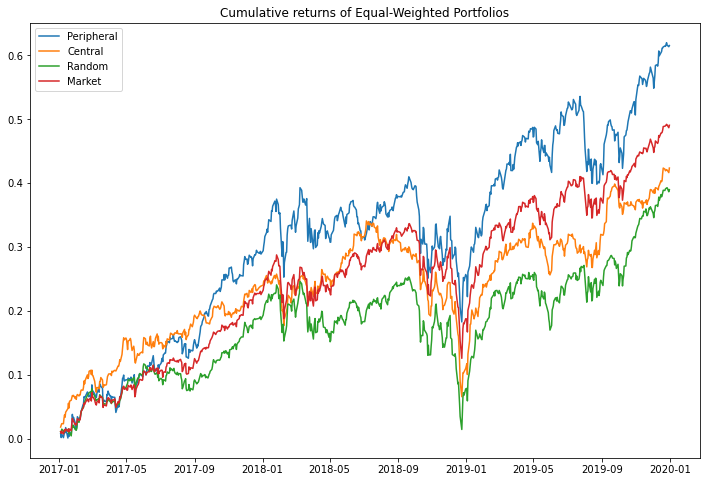

In [18]:
plt.figure(figsize=(12,8))
plt.title('Cumulative returns of Equal-Weighted Portfolios')
portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']
#plt.plot(back_results.cumsum(), label=portfolio_names)
for name in portfolio_names:
    plt.plot(eqw_back_results[name].cumsum(), label=name)

plt.legend()
plt.show();

### Smaller Basket Size


---------------------------------

Mean returns
Peripheral    0.210510
Central       0.155790
Random        0.145224
Market        0.124782
dtype: float64

Std:
Peripheral    0.148918
Central       0.109470
Random        0.109712
Market        0.096155
dtype: float64

Risk-adjusted return:
Peripheral    1.217867
Central       1.298627
Random        1.103212
Market        0.990938
dtype: float64

Betas:
{'Peripheral': 0.8243996600491056, 'Central': 0.5683866387728234, 'Random': 0.6054966536771247, 'Market': 0.2754327382530214}


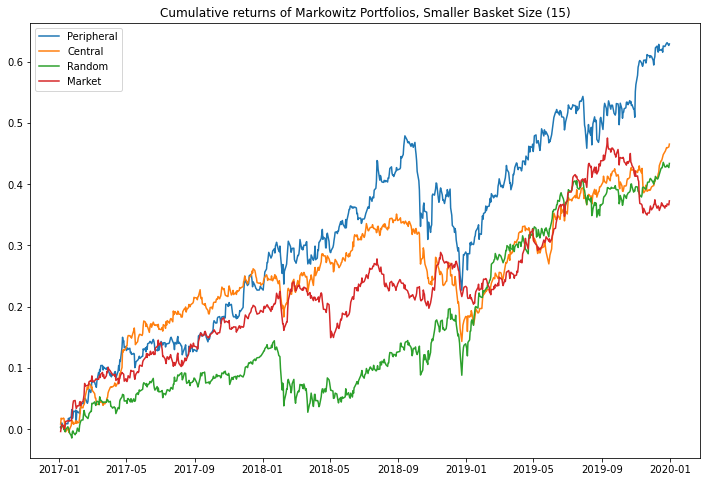

In [20]:
basket_size = 15

t_15 = Backtester(basket_size, 63, 1, 252, XY_rankings)
back_15 = t_15.backtest_markowitz_weight(log_returns_df, verbose=False)
print('\n---------------------------------\n')
print('Mean returns')
print(back_15.mean()*252)
print('\nStd:')
print(back_15.std() * np.sqrt(252))
print('\nRisk-adjusted return:')
print(back_15.mean()/eqw_back_results.std() * np.sqrt(252))
print('\nBetas:')
print(compute_betas(back_15, SnP_returns))

plt.figure(figsize=(12,8))
plt.title('Cumulative returns of Markowitz Portfolios, Smaller Basket Size (%d)'%basket_size)

portfolio_names = ['Peripheral', 'Central', 'Random', 'Market']
for name in portfolio_names:
    plt.plot(back_15[name].cumsum(), label=name)

plt.legend()
plt.show();

# What to do now
Run the portfolio generators on different specifications of rolling window/basket sizes .etc; aggregate them and put them in tables (LaTeX and python notebook) then analyze and report.


In [22]:
#basket_freqs    = [63]
#rebalance_freqs = [1]
basket_sizes    = [5, 10, 20, 30, 60]
rolling_windows = [63, 126, 252]

add_cols = ['portfolio_type', 'basket_size', 'rolling_window', 'data_type']
results_table = pd.DataFrame(columns = portfolio_names + add_cols,).set_index(add_cols)

for basket_size, rolling_window in product(basket_sizes, rolling_windows):
    print('Processing: basket size ', basket_size, ', rolling window ', rolling_window)
    backtester = Backtester(basket_size, 63, 1, rolling_window, XY_rankings)
    mkw_back_results = backtester.backtest_markowitz_weight(log_returns_df, verbose=False)
    results_table.loc[('mkw', basket_size, rolling_window, 'return'), :] = mkw_back_results.mean()*252
    results_table.loc[('mkw', basket_size, rolling_window, 'std'), :] = mkw_back_results.std() * np.sqrt(252)
    results_table.loc[('mkw', basket_size, rolling_window, 'r/s'), :] = mkw_back_results.mean()/mkw_back_results.std() * np.sqrt(252)
    
    # also need to do eqweight!
    
results_table.head()

Processing:  5 63
Processing:  5 126
Processing:  5 252
Processing:  10 63
Processing:  10 126
Processing:  10 252
Processing:  20 63
Processing:  20 126
Processing:  20 252
Processing:  30 63
Processing:  30 126
Processing:  30 252
Processing:  60 63
Processing:  60 126
Processing:  60 252


Peripheral    Central  \
portfolio_type basket_size rolling_window data_type                         
mkw            5           63             return      0.294704   0.111262   
                                          std          0.18593   0.155254   
                                          r/s          1.58503   0.716646   
                           126            return      0.337261  0.0980027   
                                          std         0.179289   0.152045   

                                                        Random     Market  
portfolio_type basket_size rolling_window data_type                        
mkw            5           63             return      0.115385   0.149833  
                                          std         0.148413  0.0838296  
                                          r/s         0.777458    1.78735  
                           126            return     0.0538671   0.155114  
                                          std         0.149705  0.0872602

In [25]:
latex_table_output = results_table.loc['mkw'].to_latex()
results_table.loc['mkw']

Peripheral    Central     Random  \
basket_size rolling_window data_type                                    
5           63             return      0.294704   0.111262   0.115385   
                           std          0.18593   0.155254   0.148413   
                           r/s          1.58503   0.716646   0.777458   
            126            return      0.337261  0.0980027  0.0538671   
                           std         0.179289   0.152045   0.149705   
                           r/s           1.8811   0.644564   0.359821   
            252            return      0.319553   0.154532   0.316911   
                           std         0.174336   0.156496   0.151696   
                           r/s          1.83298   0.987448    2.08912   
10          63             return      0.248629   0.158217   0.247147   
                           std         0.161164    0.13401   0.118469   
                           r/s           1.5427    1.18063    2.08617   
            126            return      0.221814   0.135196   0.298356   
                           std          0.15705    0.12652   0.122534   
                           r/s          1.41238    1.06857    2.43488   
            252            return      0.218557   0.172463  0.0977392   
                           std         0.154627   0.121644   0.132929   
                           r/s          1.41345    1.41777   0.735271   
20          63             return      0.224604   0.155264   0.241123   
                           std          0.16777   0.119507   0.127565   
                           r/s          1.33876     1.2992     1.8902   
            126            return      0.197569   0.181778   0.143857   
                           std         0.148519   0.105346   0.113089   
                           r/s          1.33026    1.72553    1.27207   
            252            return      0.210272   0.172715   0.156179   
                           std          0.14654   0.103943   0.107586   
                           r/s          1.43491    1.66163    1.45167   
30          63             return      0.185993    0.07293  0.0569955   
                           std         0.177128   0.134354   0.147957   
                           r/s          1.05004   0.542818   0.385217   
            126            return      0.189741   0.131373  0.0825452   
                           std         0.143568   0.107333   0.113273   
                           r/s          1.32161    1.22398   0.728725   
            252            return      0.170843   0.118925  0.0946282   
                           std         0.135761   0.104311   0.104968   
                           r/s          1.25841     1.1401   0.901498   
60          63             return      0.484563  -0.120857  0.0274409   
                           std         0.394949   0.377513   0.409163   
                           r/s           1.2269   -0.32014  0.0670659   
            126            return     0.0969137   0.164306   0.209801   
                           std         0.134926   0.122098   0.124686   
                           r/s         0.718274    1.34569    1.68264   
            252            return     0.0665684   0.139133  0.0835861   
                           std          0.11376   0.108363   0.111182   
                           r/s         0.585164    1.28396   0.751798   

                                         Market  
basket_size rolling_window data_type             
5           63             return      0.149833  
                           std        0.0838296  
                           r/s          1.78735  
            126            return      0.155114  
                           std        0.0872602  
                           r/s           1.7776  
            252            return      0.124782  
                           std        0.0961551  
                           r/s          1.29772  
10          63             return      0.149833  
     

In [35]:
results_table.columns.name = 'port type'
results_table

port type                                           Peripheral    Central  \
portfolio_type basket_size rolling_window data_type                         
mkw            5           63             return      0.294704   0.111262   
                                          std          0.18593   0.155254   
                                          r/s          1.58503   0.716646   
                           126            return      0.337261  0.0980027   
                                          std         0.179289   0.152045   
                                          r/s           1.8811   0.644564   
                           252            return      0.319553   0.154532   
                                          std         0.174336   0.156496   
                                          r/s          1.83298   0.987448   
               10          63             return      0.248629   0.158217   
                                          std         0.161164    0.13401   
                                          r/s           1.5427    1.18063   
                           126            return      0.221814   0.135196   
                                          std          0.15705    0.12652   
                                          r/s          1.41238    1.06857   
                           252            return      0.218557   0.172463   
                                          std         0.154627   0.121644   
                                          r/s          1.41345    1.41777   
               20          63             return      0.224604   0.155264   
                                          std          0.16777   0.119507   
                                          r/s          1.33876     1.2992   
                           126            return      0.197569   0.181778   
                                          std         0.148519   0.105346   
                                          r/s          1.33026    1.72553   
                           252            return      0.210272   0.172715   
                                          std          0.14654   0.103943   
                                          r/s          1.43491    1.66163   
               30          63             return      0.185993    0.07293   
                                          std         0.177128   0.134354   
                                          r/s          1.05004   0.542818   
                           126            return      0.189741   0.131373   
                                          std         0.143568   0.107333   
                                          r/s          1.32161    1.22398   
                           252            return      0.170843   0.118925   
                                          std         0.135761   0.104311   
                                          r/s          1.25841     1.1401   
               60          63             return      0.484563  -0.120857   
                                          std         0.394949   0.377513   
                                          r/s           1.2269   -0.32014   
                           126            return     0.0969137   0.164306   
                                          std         0.134926   0.122098   
                                          r/s         0.718274    1.34569   
                           252            return     0.0665684   0.139133   
                                          std          0.11376   0.108363   
                                          r/s         0.585164    1.28396   

port type                                               Random     Market  
portfolio_type basket_size rolling_window data_type                        
mkw            5           63             return      0.115385   0.149833  
                                          std         0.148413  0.0838296  
                                          r/s         0.777458    1.78735  


In [39]:
results_table.loc['mkw'].unstack()

port type                  Peripheral                        Central  \
data_type                      return       std       r/s     return   
basket_size rolling_window                                             
5           63               0.294704   0.18593   1.58503   0.111262   
            126              0.337261  0.179289    1.8811  0.0980027   
            252              0.319553  0.174336   1.83298   0.154532   
10          63               0.248629  0.161164    1.5427   0.158217   
            126              0.221814   0.15705   1.41238   0.135196   
            252              0.218557  0.154627   1.41345   0.172463   
20          63               0.224604   0.16777   1.33876   0.155264   
            126              0.197569  0.148519   1.33026   0.181778   
            252              0.210272   0.14654   1.43491   0.172715   
30          63               0.185993  0.177128   1.05004    0.07293   
            126              0.189741  0.143568   1.32161   0.131373   
            252              0.170843  0.135761   1.25841   0.118925   
60          63               0.484563  0.394949    1.2269  -0.120857   
            126             0.0969137  0.134926  0.718274   0.164306   
            252             0.0665684   0.11376  0.585164   0.139133   

port type                                          Random            \
data_type                        std       r/s     return       std   
basket_size rolling_window                                            
5           63              0.155254  0.716646   0.115385  0.148413   
            126             0.152045  0.644564  0.0538671  0.149705   
            252             0.156496  0.987448   0.316911  0.151696   
10          63               0.13401   1.18063   0.247147  0.118469   
            126              0.12652   1.06857   0.298356  0.122534   
            252             0.121644   1.41777  0.0977392  0.132929   
20          63              0.119507    1.2992   0.241123  0.127565   
            126             0.105346   1.72553   0.143857  0.113089   
            252             0.103943   1.66163   0.156179  0.107586   
30          63              0.134354  0.542818  0.0569955  0.147957   
            126             0.107333   1.22398  0.0825452  0.113273   
            252             0.104311    1.1401  0.0946282  0.104968   
60          63              0.377513  -0.32014  0.0274409  0.409163   
            126             0.122098   1.34569   0.209801  0.124686   
            252             0.108363   1.28396  0.0835861  0.111182   

port type                                Market                      
data_type                         r/s    return        std      r/s  
basket_size rolling_window                                           
5           63               0.777458  0.149833  0.0838296  1.78735  
            126              0.359821  0.155114  0.0872602   1.7776  
            252               2.08912  0.124782  0.0961551  1.29772  
10          63                2.08617  0.149833  0.0838296  1.78735  
            126               2.43488  0.155114  0.0872602   1.7776  
            252              0.735271  0.124782  0.0961551  1.29772  
20          63                 1.8902  0.149833  0.0838296  1.78735  
            126               1.27207  0.155114  0.0872602   1.7776  
            252               1.45167  0.124782  0.0961551  1.29772  
30          63               0.385217  0.149833  0.0838296  1.78735  
            126              0.728725  0.155114  0.0872602   1.7776  
            252              0.901498  0.124782  0.0961551  1.29772  
60          63              0.0670659  0.149833  0.0838296  1.78735  
            126               1.68264  0.155114  0.0872602   1.7776  
            252              0.751798  0.124782  0.0961551  1.29772

In [37]:
results_table.loc['mkw'].stack().unstack(level=-2).unstack(-1)


data_type                      return                                  \
port type                  Peripheral    Central     Random    Market   
basket_size rolling_window                                              
5           63               0.294704   0.111262   0.115385  0.149833   
            126              0.337261  0.0980027  0.0538671  0.155114   
            252              0.319553   0.154532   0.316911  0.124782   
10          63               0.248629   0.158217   0.247147  0.149833   
            126              0.221814   0.135196   0.298356  0.155114   
            252              0.218557   0.172463  0.0977392  0.124782   
20          63               0.224604   0.155264   0.241123  0.149833   
            126              0.197569   0.181778   0.143857  0.155114   
            252              0.210272   0.172715   0.156179  0.124782   
30          63               0.185993    0.07293  0.0569955  0.149833   
            126              0.189741   0.131373  0.0825452  0.155114   
            252              0.170843   0.118925  0.0946282  0.124782   
60          63               0.484563  -0.120857  0.0274409  0.149833   
            126             0.0969137   0.164306   0.209801  0.155114   
            252             0.0665684   0.139133  0.0835861  0.124782   

data_type                         std                                 \
port type                  Peripheral   Central    Random     Market   
basket_size rolling_window                                             
5           63                0.18593  0.155254  0.148413  0.0838296   
            126              0.179289  0.152045  0.149705  0.0872602   
            252              0.174336  0.156496  0.151696  0.0961551   
10          63               0.161164   0.13401  0.118469  0.0838296   
            126               0.15705   0.12652  0.122534  0.0872602   
            252              0.154627  0.121644  0.132929  0.0961551   
20          63                0.16777  0.119507  0.127565  0.0838296   
            126              0.148519  0.105346  0.113089  0.0872602   
            252               0.14654  0.103943  0.107586  0.0961551   
30          63               0.177128  0.134354  0.147957  0.0838296   
            126              0.143568  0.107333  0.113273  0.0872602   
            252              0.135761  0.104311  0.104968  0.0961551   
60          63               0.394949  0.377513  0.409163  0.0838296   
            126              0.134926  0.122098  0.124686  0.0872602   
            252               0.11376  0.108363  0.111182  0.0961551   

data_type                         r/s                                
port type                  Peripheral   Central     Random   Market  
basket_size rolling_window                                           
5           63                1.58503  0.716646   0.777458  1.78735  
            126                1.8811  0.644564   0.359821   1.7776  
            252               1.83298  0.987448    2.08912  1.29772  
10          63                 1.5427   1.18063    2.08617  1.78735  
            126               1.41238   1.06857    2.43488   1.7776  
            252               1.41345   1.41777   0.735271  1.29772  
20          63                1.33876    1.2992     1.8902  1.78735  
            126               1.33026   1.72553    1.27207   1.7776  
            252               1.43491   1.66163    1.45167  1.29772  
30          63                1.05004  0.542818   0.385217  1.78735  
            126               1.32161   1.22398   0.728725   1.7776  
            252               1.25841    1.1401   0.901498  1.29772  
60          63                 1.2269  -0.32014  0.0670659  1.78735  
            126              0.718274   1.34569    1.68264   1.7776  
            252              0.585164   1.28396   0.751798  1.29772

In [ ]:
pd.pivot_table(results_table.loc['mkw'], index=['data_type'], columns=['basket_size', 'rolling_window'])